<img src = 'best-black-friday-deals.jpg' width = '500' height= '350' >

## Problem statement:
A retail company “Wisconn American Dreams Pvt. Ltd.” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories during Black Friday Sales days. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month. They want to gain insights on the customer purchase pattern and other potential mediums of increase in sales.

# Goal:
Perform EDA on the Black Friday and gain insights into *purchasing power* of the customer for the selected listed products during Black Firday Sale days.

# Research Questions
* 		How do customer demographics influence purchase behavior?
    * Investigate if there's a correlation between age, gender, marital status, city type, and stay duration in the current city with the purchase amount.
* 		What is the impact of product categories on purchase amounts?
    * Analyze how different product categories contribute to the overall purchase amount and identify the categories with the highest sales.
* 		How does the combination of product categories affect purchase behavior?
    * Explore if there are common combinations of product categories (Product_Category_1, Product_Category_2, Product_Category_3) that lead to higher purchase amounts.
    
# Hypothesis:
- **Purchasing Power Hypothesis**: <br>
    - Men have more purchasing power than women
    - 

# Approach:

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import random
%matplotlib inline

pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
# Read the CSV files
train_df = pd.read_csv('train.csv')  
test_df = pd.read_csv('test.csv')  

merged_df = pd.concat([train_df, test_df], axis=0)

# If you want to reset the index of the merged DataFrame
merged_df.reset_index(drop=True, inplace=True)

In [3]:
merged_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [4]:
print(train_df.shape)
print(test_df.shape)
print(merged_df.shape)

(550068, 12)
(233599, 11)
(783667, 12)


In [5]:
df = merged_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.describe(include = 'object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,783667,783667,783667,783667,783667
unique,3677,2,7,3,5
top,P00265242,M,26-35,B,1
freq,2709,590031,313015,329739,276425


In [8]:
# Drop user_id as it is redundant
df.drop(['User_ID'], inplace= True, axis = 1)

In [9]:
# Changing datatypes
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '', regex = False)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

### Correcting Categorical Features to correct encoding:

- Gender and Age

In [10]:
for col in df.describe(include='object').columns:
    print(col, ':')
    print(df[col].unique())
    print('-'*50)
    print()

Product_ID :
['P00069042' 'P00248942' 'P00087842' ... 'P00030342' 'P00074942'
 'P00253842']
--------------------------------------------------

Gender :
['F' 'M']
--------------------------------------------------

Age :
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
--------------------------------------------------

City_Category :
['A' 'C' 'B']
--------------------------------------------------



In [11]:
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})
df['Age_Encoded'] = df['Age'].map({
    '0-17': 1,
    '18-25': 2,
    '26-35': 3,
    '36-45': 4,
    '46-50': 5,
    '51-55': 6,
    '55+': 7
})

In [12]:
# Dataframe for Nulls and their percentage in column 
nulls = pd.DataFrame(df.isnull().sum()/df.shape[0]*100, columns = ['perecntage_nulls'])
nulls['total_nulls'] = df.isnull().sum()
nulls


,perecntage_nulls,total_nulls
Product_ID,0.000000,0
Gender,0.000000,0
Age,0.000000,0
Occupation,0.000000,0
City_Category,0.000000,0
Stay_In_Current_City_Years,0.000000,0
Marital_Status,0.000000,0
Product_Category_1,0.000000,0
Product_Category_2,31.388587,245982
Product_Category_3,69.648078,545809


In [13]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Encoded
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370.0,1
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0,1
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422.0,1
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057.0,1
4,P00285442,0,55+,16,C,4,0,8,NaN,NaN,7969.0,7


In [14]:
# Progress copied
df_copy_till_category_correction = df.copy()

In [15]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
Age_Encoded                        0
dtype: int64

In [16]:
top_modes = df['Product_Category_3'].mode().nlargest(3).to_list()
top_modes_2 = df['Product_Category_2'].mode().nlargest(3).to_list()

df['Product_Category_2'] = df['Product_Category_2'].apply(lambda x: np.random.choice(top_modes_2) if pd.isnull(x) else x)
df['Product_Category_3'] = df['Product_Category_3'].apply(lambda x: np.random.choice(top_modes) if pd.isnull(x) else x)

In [17]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
Age_Encoded                        0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  Age_Encoded                 783667 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 71.7+ MB


In [19]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Encoded
0,P00069042,1,0-17,10,A,2,0,3,8.0,16.0,8370.0,1
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0,1
2,P00087842,1,0-17,10,A,2,0,12,8.0,16.0,1422.0,1
3,P00085442,1,0-17,10,A,2,0,12,14.0,16.0,1057.0,1
4,P00285442,0,55+,16,C,4,0,8,8.0,16.0,7969.0,7


In [21]:
df_age_grouped = df.groupby('Age').agg({
    'Product_Category_1': 'count',
    'Product_Category_2': 'count',
    'Product_Category_3': 'count'
}).reset_index()

df_age_grouped

,Age,Product_Category_1,Product_Category_2,Product_Category_3
0,0-17,21334,21334,21334
1,18-25,141953,141953,141953
2,26-35,313015,313015,313015
3,36-45,156724,156724,156724
4,46-50,65278,65278,65278
5,51-55,54784,54784,54784
6,55+,30579,30579,30579


In [22]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [35]:
df2 = df.groupby('Product_Category_1').agg({
    'Product_Category_1': 'count'}).rename({'Product_Category_1': 'Product_Count'})

In [48]:
df_ctg_1 = df.groupby(['Age', 'Product_Category_1']).agg({
    'Product_Category_1': 'count'
}).rename(columns={'Product_Category_1': 'Count of Product'}).reset_index()

df_ctg_2 = df.groupby(['Age', 'Product_Category_2']).agg({
    'Product_Category_2': 'count'
}).rename(columns={'Product_Category_2': 'Count of Product'}).reset_index()

df_ctg_3 = df.groupby(['Age', 'Product_Category_3']).agg({
    'Product_Category_3': 'count'
}).rename(columns={'Product_Category_3': 'Count of Product'}).reset_index()



In [50]:
df_ctg_2

,Age,Product_Category_2,Count of Product
0,0-17,2.0,1946
1,0-17,3.0,169
2,0-17,4.0,2171
3,0-17,5.0,1452
4,0-17,6.0,533
5,0-17,7.0,18
6,0-17,8.0,8336
7,0-17,9.0,225
8,0-17,10.0,71
9,0-17,11.0,556


In [51]:
age_groups = df['Age'].unique().to_list()

def plot_bar_graph():
    for age_group in age_groups:
        # Filter the DataFrame for the current age group
        df_filtered = df[df['Age'] == age_group]
        
        # Get counts of product categories within this age group
        category_counts = df_filtered.groupby('Product_Category_1').size()
        
        # Create a bar plot for this age group
        plt.figure(figsize=(10, 7))
        plt.bar(category_counts.index, category_counts.values)
        plt.title(f'Product Category Counts for Age Group {age_group}')
        plt.xlabel('Product Category')
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate category labels for better readability
        plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'to_list'

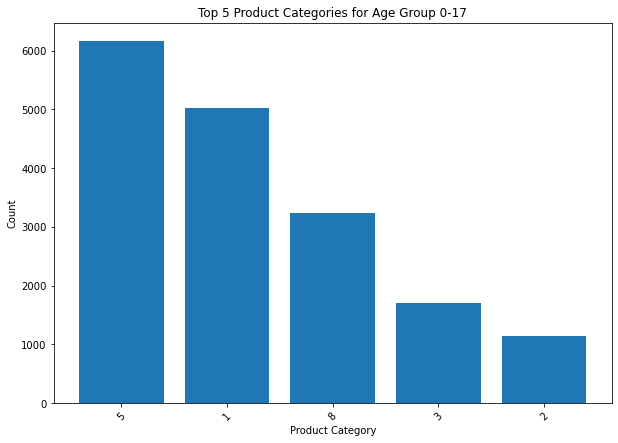

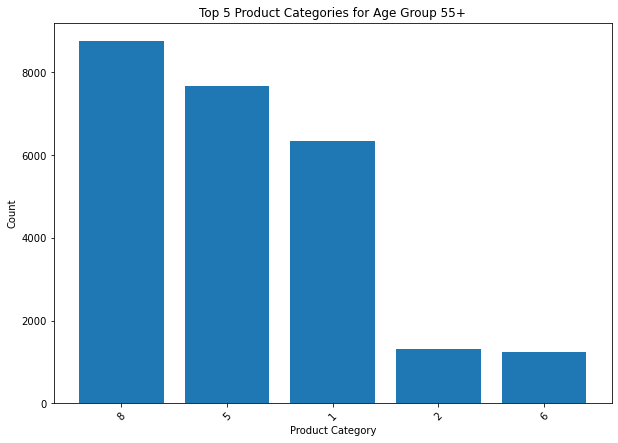

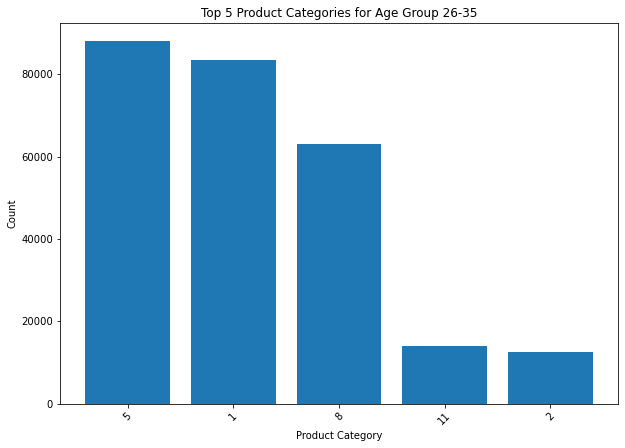

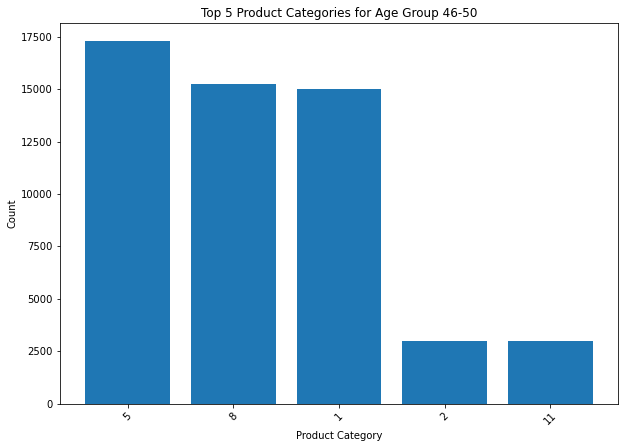

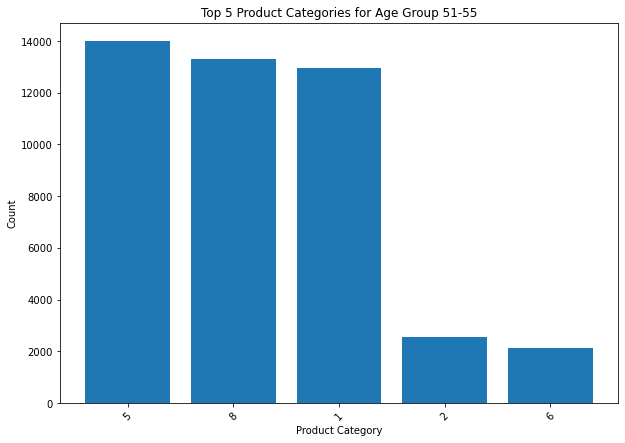

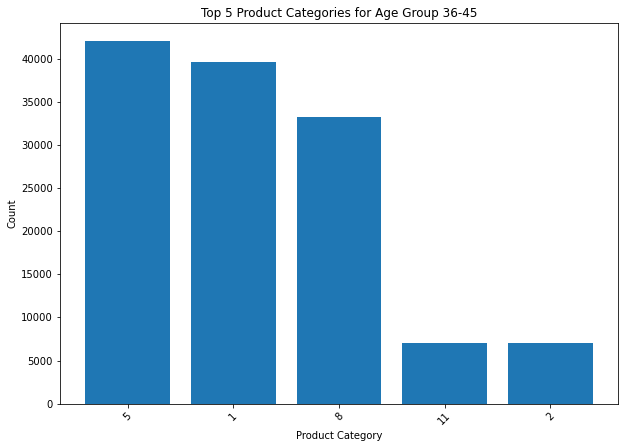

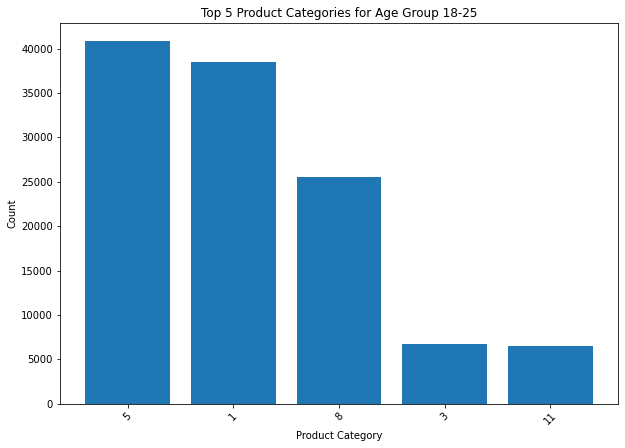

In [55]:
import matplotlib.pyplot as plt

# Ensure 'Age' and 'Product_Category_1' are in a suitable format
df['Age'] = df['Age'].astype(str)
df['Product_Category_1'] = df['Product_Category_1'].astype(str)

# Get unique age groups
age_groups = df['Age'].unique().tolist()

def plot_top_5_bar_graph():
    for age_group in age_groups:
        # Filter the DataFrame for the current age group
        df_filtered = df[df['Age'] == age_group]
        
        # Get counts of product categories within this age group
        category_counts = df_filtered.groupby('Product_Category_1').size()
        
        # Sort the counts in descending order and select the top 5
        top_5_categories = category_counts.sort_values(ascending=False).head(5)
        
        # Create a bar plot for the top 5 product categories in this age group
        plt.figure(figsize=(10, 7))
        plt.bar(top_5_categories.index, top_5_categories.values)
        plt.title(f'Top 5 Product Categories for Age Group {age_group}')
        plt.xlabel('Product Category')
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate category labels for better readability
        plt.show()

# Call the function to plot bar graphs for the top 5 product categories in all age groups
plot_top_5_bar_graph()
